In [25]:
import zipfile
with zipfile.ZipFile('C:\Input\ml-latest-small.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [26]:
#import the dataset
import pandas as pd
movies_df = pd.read_csv('data/ml-latest-small/movies.csv')
ratings_df = pd.read_csv('data/ml-latest-small/ratings.csv')

In [27]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
movies_df.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [29]:
ratings_df.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [30]:
MovieRating=pd.merge(ratings_df,movies_df,how='left')
MovieRating

userId  movieId  rating   timestamp                           title  \
0            1        1     4.0   964982703                Toy Story (1995)   
1            1        3     4.0   964981247         Grumpier Old Men (1995)   
2            1        6     4.0   964982224                     Heat (1995)   
3            1       47     5.0   964983815     Seven (a.k.a. Se7en) (1995)   
4            1       50     5.0   964982931      Usual Suspects, The (1995)   
...        ...      ...     ...         ...                             ...   
100831     610   166534     4.0  1493848402                    Split (2017)   
100832     610   168248     5.0  1493850091   John Wick: Chapter Two (2017)   
100833     610   168250     5.0  1494273047                  Get Out (2017)   
100834     610   168252     5.0  1493846352                    Logan (2017)   
100835     610   170875     3.0  1493846415  The Fate of the Furious (2017)   

                                             genres  
0       Adventure|Animation|Children|Comedy|Fantasy  
1                                    Comedy|Romance  
2                             Action|Crime|Thriller  
3                                  Mystery|Thriller  
4                            Crime|Mystery|Thriller  
...                                             ...  
100831                        Drama|Horror|Thriller  
100832                        Action|Crime|Thriller  
100833                                       Horror  
100834                                Action|Sci-Fi  
100835                  Action|Crime|Drama|Thriller  

[100836 rows x 6 columns]

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

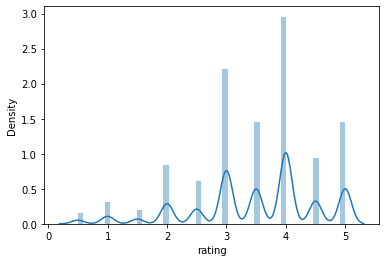

In [31]:
sb.distplot(MovieRating['rating'])

In [32]:
MovieRating.value_counts('rating').sort_index

<bound method Series.sort_index of rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
dtype: int64>

In [33]:
#from sklearn.cluster import KMeanssort_indexans(n_clusters=8)
print(MovieRating.shape[0])

100836


In [34]:
MovieRating.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres'], dtype='object')

In [35]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=8)

<AxesSubplot:xlabel='rating'>

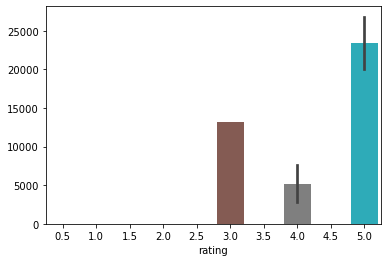

In [36]:
sb.barplot(x='rating',y=MovieRating.value_counts('rating'),data=MovieRating)